In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

np.random.seed(0)

In [2]:
# Loading training and testing dataset
def load_data(file):
    df = pd.read_csv(file)
    # Dropping the ID column
    df.drop("Id", axis=1, inplace=True)
    # Seperating the features and target values
    X = df.iloc[:, 0:df.shape[1]-1]
    y = df.iloc[:, df.shape[1]-1]
    # Label encoding the target text values for all the classes
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y) #encoded labels
    # Splitting the training (70%) and testing set (30%)
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=0)
    # Converting the input datatype to float
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    # Normalizing our input dataframe
    trainX = (trainX-trainX.mean()) / trainX.std()
    testX = (testX-testX.mean()) / testX.std()
    # One hot encoded target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# Defining the sequential model
def define_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(4,)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax'))
    #adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0, amsgrad=False)
    #rmsprop = optimizers.RMSprop(lr=0.01, rho=0.99, epsilon=1e-07)
    sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=losses.categorical_crossentropy, optimizer='sgd', metrics=[metrics.categorical_accuracy])
    #categorical_crossentropy, kullback_leibler_divergence, hinge
    return model

# Plotting the training and validation loss
def plot_losses(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss)+1)
    plt.figure(figsize=(10,5), facecolor='w')
    plt.plot(epochs, train_loss, 'k', label='Training Loss')    # Black line
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')     # Blue dots
    plt.title('Training and Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')
    #plt.savefig('train_loss.png') #saving plots
    plt.show()

In [3]:
# Building the program and running the model
def run_model():
    # Loading the dataset
    trainX, trainY, testX, testY = load_data("iris.csv")
    # Defining the model
    model = define_model()
    # Fitting the model
    history = model.fit(trainX, trainY, epochs=150, batch_size=32, validation_split=0.3, verbose=0)
    # Plotting the learning curves
    plot_losses(history)
    model.save('classification.h5')

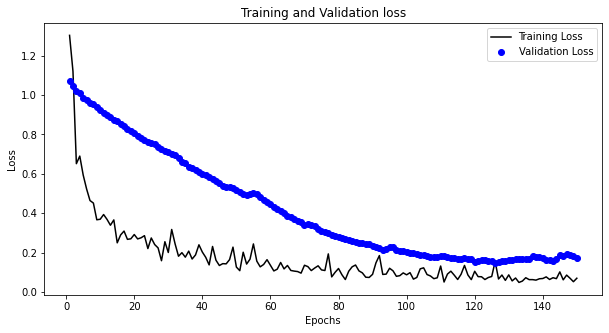

In [4]:
# Executing the model
run_model()

In [5]:
# Evaluating the final model on the test set

trainX, trainY, testX, testY = load_data("iris.csv")
final_model = load_model('classification.h5')
_, acc = final_model.evaluate(testX, testY, verbose=0)
print('Accuracy = %.2f' % (acc * 100))

Accuracy = 82.22
